# Linear Regression 선형회귀

공부 시간에 따른 시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [ ]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직적까지의 데이터 [독립변수 - 원인]
y = dataset.iloc[:, -1].values #마지막 칼럼 데이터 [종속 변수 - 결과]

In [ ]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # 학습(모델 생성)

LinearRegression()

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

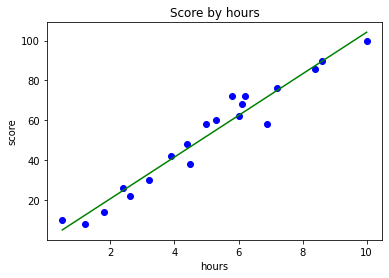

In [ ]:
plt.scatter(X, y, color="blue") # 산점도
plt.plot(X, y_pred, color = "green") # 선 그래프
plt.title("Score by hours") #제목

plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
print('9시간 공부했을 때 예상 점수? :' , reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부했을 때 예상 점수? : [93.77478776]


In [ ]:
reg.coef_ # 기울기

-0.218484702867201

In [ ]:
reg.intercept_ # y절편

-0.218484702867201